<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_3_2_2_Lab_Cost_Function_for_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Cost Function for Logistic Regression

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

## Toy Dataset

In [3]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])

pos = (y_train == 1)
neg = (y_train == 0)

## Plot Data

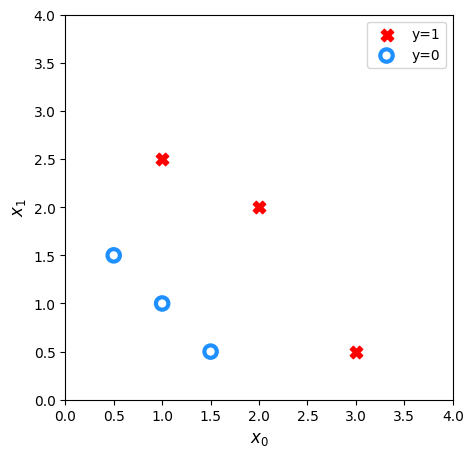

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(X_train[pos, 0], X_train[pos, 1],
              marker='X', s=80, c='red', label='y=1')
ax.scatter(X_train[neg, 0], X_train[neg, 1],
              marker='o', s=80, facecolors='none',
              edgecolor='dodgerblue', lw=3, label='y=0')
ax.axis([0, 4, 0, 4])
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_ylabel('$x_1$', fontsize=12)
ax.legend()

plt.show()

## Cost Function

$$
L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right) = -y^{(i)}\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} - \left(1 - y^{(i)}\right)\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)}
$$
<hr/>
$$
\begin{align}
J\left(\vec{w},b\right) &= \frac{1}{m}\sum_{i=1}^{m}\left(L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right)\right) \\
&= \frac{1}{m}\sum_{i=1}^{m}\left(-y^{(i)}\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} - \left(1 - y^{(i)}\right)\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)}\right) \\
&= -\frac{1}{m}\sum_{i=1}^{m}\left(y^{(i)}\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} + \left(1 - y^{(i)}\right)\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)}\right)
\end{align}
$$
<hr/>
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)}) \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\ \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}
\end{align}
$$

The algorithm for `compute_cost_logistic` loops over all the examples calculating the loss for each example and accumulating the total.

Note that the variables X and y are not scalar values but matrices of shape ($m, n$) and ($𝑚$,) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.

In [5]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    cost /= m
    return cost

In [6]:
w_tmp = np.array([1, 1])
b_tmp = -3

compute_cost_logistic(X_train, y_train, w_tmp, b_tmp)

0.36686678640551745

For $b = -3$, $w_0 = 1$ and $w_1 = 1$, the decision boundary is given by $-3 + x_0 + x_1 = 0$

In [7]:
w_tmp_2 = w_tmp
b_tmp_2 = -4

compute_cost_logistic(X_train, y_train, w_tmp_2, b_tmp_2)

0.5036808636748461

For $b = -4$, $w_0 = 1$ and $w_1 = 1$, the decision boundary is given by $-4 + x_0 + x_1 = 0$

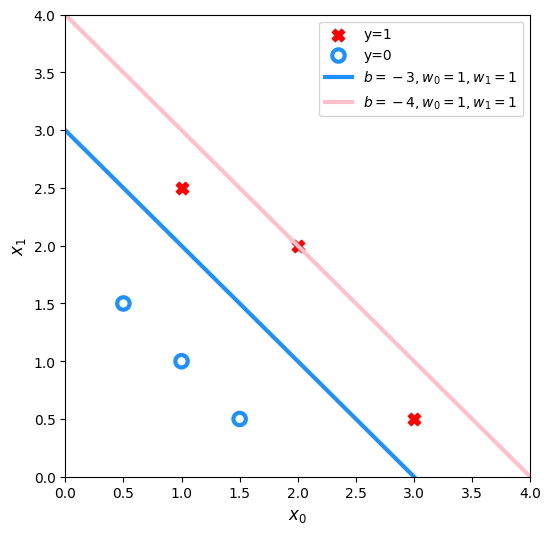

In [8]:
x0 = np.arange(0, 6)
x1 = 3 - x0

x0_other = x0
x1_other = 4 - x0_other

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# plot the data
ax.scatter(X_train[pos, 0], X_train[pos, 1],
              marker='X', s=80, c='red', label='y=1')
ax.scatter(X_train[neg, 0], X_train[neg, 1],
              marker='o', s=80, facecolors='none',
              edgecolor='dodgerblue', lw=3, label='y=0')
ax.axis([0, 4, 0, 4])
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_ylabel('$x_1$', fontsize=12)

# plot decision boundaries
ax.plot(x0, x1, c='dodgerblue', lw=3, label=r'$b = -3, w_0 = 1, w_1 = 1$')
ax.plot(x0_other, x1_other, c='pink', lw=3, label=r'$b = -4, w_0 = 1, w_1 = 1$')

ax.legend(loc='upper right')
plt.show()

In [9]:
print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_tmp_2, b_tmp_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461
